<a href="https://colab.research.google.com/github/icuz/miniProject/blob/main/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2612, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 2612 (delta 89), reused 208 (delta 73), pack-reused 2346
Receiving objects: 100% (2612/2612), 69.71 MiB | 21.99 MiB/s, done.
Resolving deltas: 100% (1172/1172), done.


In [ ]:
cd DeOldify


/content/DeOldify


In [ ]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')


In [ ]:
!pip install -r requirements-colab.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 20.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using 

In [ ]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


In [ ]:
!mkdir 'models'
!wget https://www.dropbox.com/s/axsd2g85uyixaho/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2024-06-11 05:04:17--  https://www.dropbox.com/s/axsd2g85uyixaho/ColorizeStable_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /scl/fi/lqpj4methnbmgjd9wlqto/ColorizeStable_gen.pth?rlkey=sj7d54400lq8898wf3s2higco&dl=0 [following]
--2024-06-11 05:04:17--  https://www.dropbox.com/scl/fi/lqpj4methnbmgjd9wlqto/ColorizeStable_gen.pth?rlkey=sj7d54400lq8898wf3s2higco&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9797f22f6bdd7a56632f6336bc.dl.dropboxusercontent.com/cd/0/inline/CUkGpbo7eizmjrynJVEcS-kikf2iCdTvQ0f0vCPzi5H_WSu9x6nxkJXSD_tLG_9ATTWC5HihXrT5zHDT3-CTU0MBskdYlaOT51vvb0t8HI3RWGtOY7dfSaXigksfmU0QYwB0pUQtHycdrCb6MXCGTkvt/file# [following]
--2024-06-11 05:04:18--

In [ ]:
colorizer = get_image_colorizer(artistic=False)

/content/DeOldify/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/content/DeOldify/fastai/data_block.py:453: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  warn("""Your validation set is empty. If this is by design, use `split_none()`
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  wa

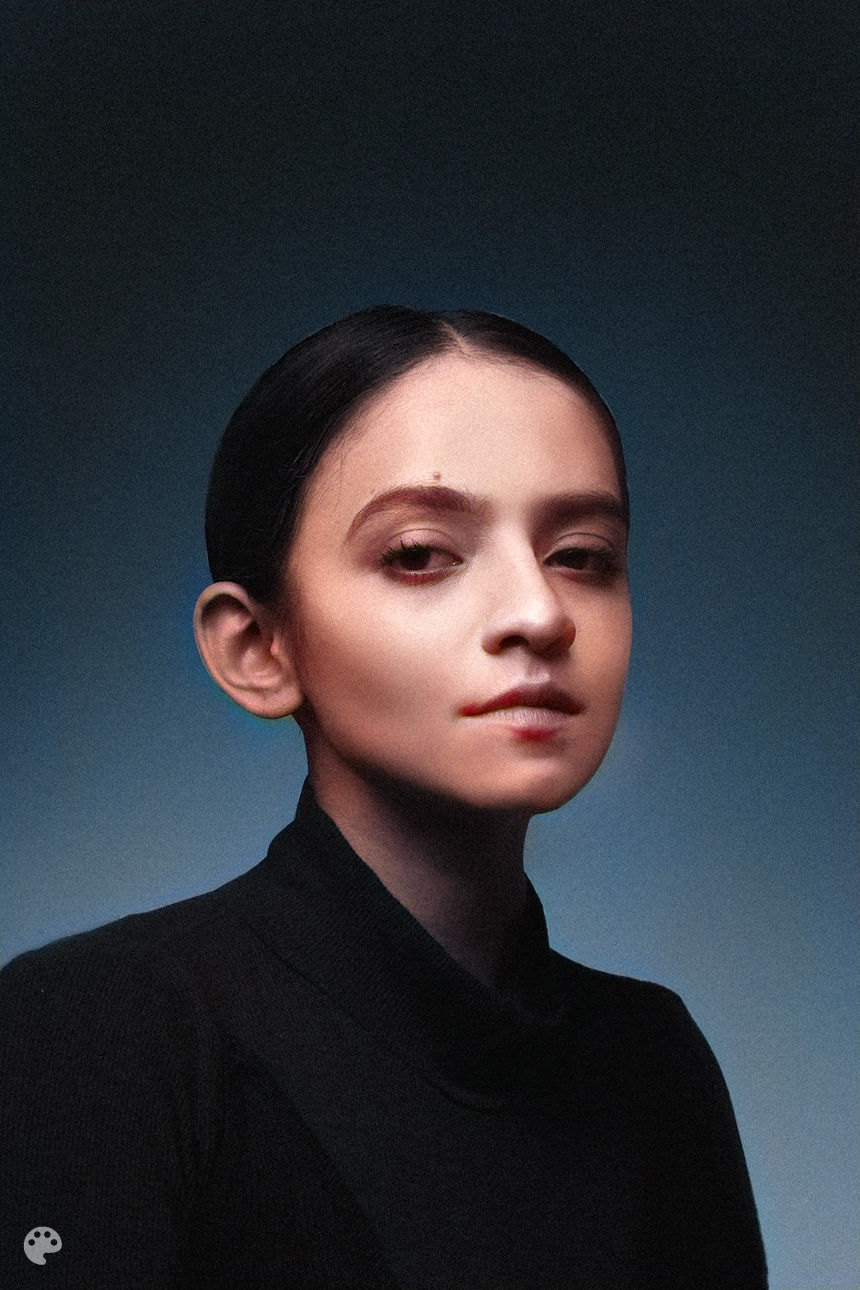

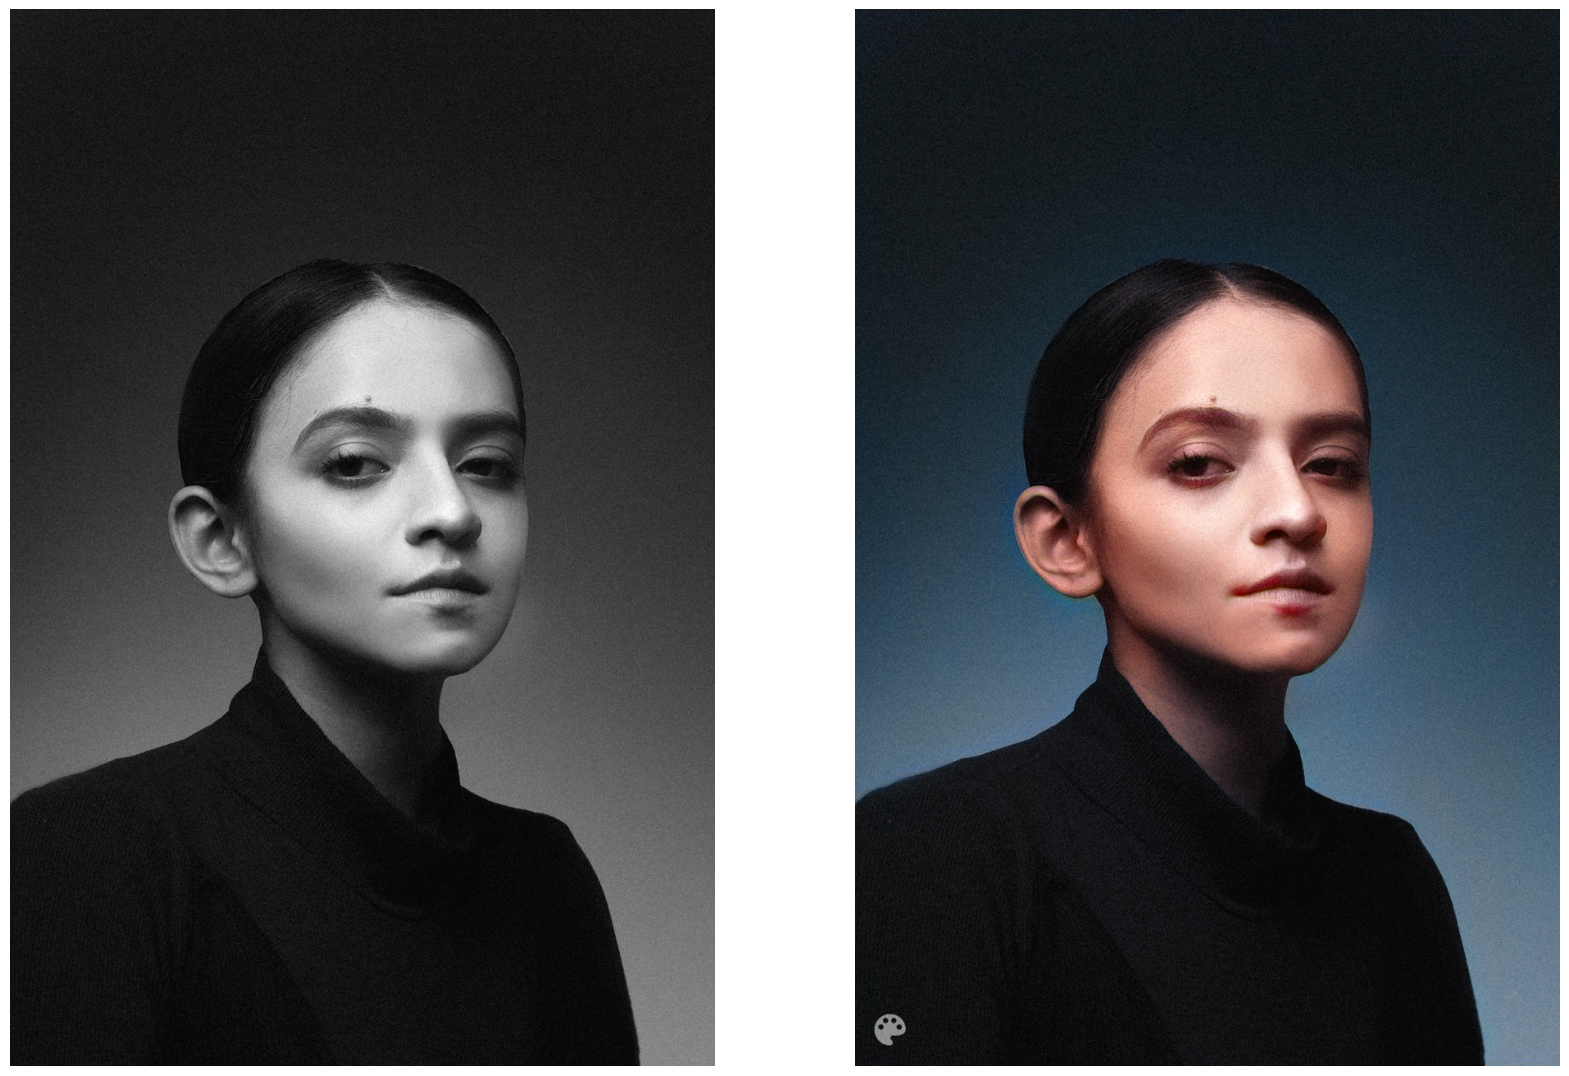

In [ ]:
source_url = 'https://imgs.search.brave.com/QRVcnEqicqM9YeM5OK3_mQZCKZD8hDosN9yJbG2O4C4/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9pbWFn/ZXMudW5zcGxhc2gu/Y29tL3Bob3RvLTE2/MjAxMjIzMDMwMjAt/ODdlYzgyNmNmNzBk/P3E9ODAmdz0xMDAw/JmF1dG89Zm9ybWF0/JmZpdD1jcm9wJml4/bGliPXJiLTQuMC4z/Jml4aWQ9TTN3eE1q/QTNmREI4TUh4elpX/RnlZMmg4Tkh4OFlt/eGhZMnNsTWpCaGJt/UWxNakIzYUdsMFpT/VXlNSEJ2Y25SeVlX/bDBmR1Z1ZkRCOGZE/QjhmSHd3' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))